In [423]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm
import re
from sklearn.preprocessing import MultiLabelBinarizer, StandardScaler, LabelEncoder

# EDA

## Считывание данных

In [424]:
train_df = pd.read_csv("data/train.csv").drop(columns=["Unnamed: 0"])
X_test = pd.read_csv("data/test.csv").drop(columns=["Unnamed: 0"])
train_df

,Grade,Case_ID,Gender,Age_at_diagnosis,Primary_Diagnosis,Race,IDH1,TP53,ATRX,PTEN,...,FUBP1,RB1,NOTCH1,BCOR,CSMD3,SMARCA4,GRIN2A,IDH2,FAT4,PDGFRA
0,GBM,TCGA-06-A6S0,Male,79 years 183 days,Glioblastoma,black or african american,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,...,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED
1,LGG,TCGA-HT-8106,Male,53 years 197 days,"Astrocytoma, anaplastic",white,MUTATED,MUTATED,NOT_MUTATED,NOT_MUTATED,...,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,MUTATED,NOT_MUTATED
2,LGG,TCGA-HT-7607,Female,61 years 305 days,"Astrocytoma, NOS",white,MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,...,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED
3,LGG,TCGA-QH-A6X5,Female,58 years 55 days,Mixed glioma,white,MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,...,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED
4,LGG,TCGA-P5-A5F1,Male,30 years 113 days,"Astrocytoma, NOS",white,MUTATED,MUTATED,MUTATED,NOT_MUTATED,...,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
598,GBM,TCGA-06-0744,Male,67 years,Glioblastoma,white,NOT_MUTATED,MUTATED,NOT_MUTATED,NOT_MUTATED,...,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED
599,LGG,TCGA-DU-A6S7,Female,27 years 309 days,"Astrocytoma, anaplastic",white,MUTATED,MUTATED,MUTATED,NOT_MUTATED,...,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED
600,LGG,TCGA-DU-5853,Male,29 years 32 days,Mixed glioma,white,MUTATED,MUTATED,MUTATED,NOT_MUTATED,...,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED
601,LGG,TCGA-DU-A76R,Male,51 years 312 days,"Oligodendroglioma, anaplastic",white,MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,...,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED


In [425]:
X_test

,Case_ID,Gender,Age_at_diagnosis,Primary_Diagnosis,Race,IDH1,TP53,ATRX,PTEN,EGFR,...,FUBP1,RB1,NOTCH1,BCOR,CSMD3,SMARCA4,GRIN2A,IDH2,FAT4,PDGFRA
0,TCGA-DU-A5TW,Female,33 years 54 days,"Astrocytoma, anaplastic",black or african american,MUTATED,MUTATED,MUTATED,NOT_MUTATED,NOT_MUTATED,...,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED
1,TCGA-DU-7007,Male,33 years 192 days,"Astrocytoma, NOS",white,MUTATED,MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,...,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED
2,TCGA-P5-A5EZ,Male,39 years 131 days,"Astrocytoma, anaplastic",white,MUTATED,MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,...,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED
3,TCGA-02-0055,Female,62 years 153 days,Glioblastoma,white,NOT_MUTATED,MUTATED,NOT_MUTATED,MUTATED,NOT_MUTATED,...,NOT_MUTATED,MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,MUTATED,NOT_MUTATED
4,TCGA-28-5218,Male,63 years 86 days,Glioblastoma,white,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,...,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
254,TCGA-S9-A6WG,Male,31 years 187 days,"Astrocytoma, anaplastic",white,MUTATED,MUTATED,MUTATED,NOT_MUTATED,NOT_MUTATED,...,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED
255,TCGA-E1-A7YY,Female,27 years 6 days,"Oligodendroglioma, NOS",white,MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,...,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED
256,TCGA-HW-8320,Male,36 years 354 days,"Astrocytoma, anaplastic",white,MUTATED,MUTATED,MUTATED,NOT_MUTATED,NOT_MUTATED,...,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED
257,TCGA-14-0740,Male,70 years 60 days,Glioblastoma,white,NOT_MUTATED,MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,...,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,MUTATED


## Кодирование целевой переменной

In [426]:
y_train = train_df["Grade"].apply(lambda x: 1 if x == "GBM" else 0)
X_train = train_df.drop(columns=["Grade"])

## Удаление ненужных колонок

In [427]:
X_train = X_train.drop(columns=["Case_ID"])

X_test = X_test.drop(columns=["Case_ID"])

## Конвертирование возраста (годы, дни) в число типа float

In [428]:
def age_to_float(age: str):
    nums = re.findall(r"\d+", age)
    if len(nums) == 2:
        nums[1] = float(nums[1]) / 365
        return float(nums[0]) + nums[1]
    elif len(nums) == 1:
        return float(nums[0])
    return None

In [429]:
X_train["Age_at_diagnosis"] = X_train["Age_at_diagnosis"].apply(age_to_float)
X_train["Age_at_diagnosis"] = X_train["Age_at_diagnosis"].fillna(
    X_train["Age_at_diagnosis"].mean()
)

X_test["Age_at_diagnosis"] = X_test["Age_at_diagnosis"].apply(age_to_float)
X_test["Age_at_diagnosis"] = X_test["Age_at_diagnosis"].fillna(
    X_test["Age_at_diagnosis"].mean()
)

## One-hot кодирование даигнозов

In [430]:
X_train = X_train.drop(columns=["Primary_Diagnosis"])
X_test = X_test.drop(columns=["Primary_Diagnosis"])

## One-hot кодирование расы

In [431]:
races_encoded = pd.get_dummies(X_train["Race"]).drop(
    columns=["not reported", "--", "american indian or alaska native"]
)
X_train = X_train.drop(columns=["Race"])

races_encoded_test = pd.get_dummies(X_test["Race"]).drop(columns=["not reported", "--"])
X_test = X_test.drop(columns=["Race"])

## One-hot кодирование пола

In [432]:
gender_encoded = pd.get_dummies(X_train["Gender"]).drop(columns=["--"])
X_train = X_train.drop(columns=["Gender"])

gender_encoded_test = pd.get_dummies(X_test["Gender"]).drop(columns=["--"])
X_test = X_test.drop(columns=["Gender"])

## One-hot кодирование всех колонок с информацией о мутации генов

In [433]:
genes_df = X_train.drop(columns=["Age_at_diagnosis"])
le = LabelEncoder()
le.fit(genes_df["IDH1"])
for col in genes_df.columns:
    genes_df[col] = le.transform(genes_df[col])


genes_df_test = X_test.drop(columns=["Age_at_diagnosis"])
for col in genes_df_test.columns:
    genes_df_test[col] = le.transform(genes_df_test[col])

In [434]:
X_train = pd.concat(
    [X_train[["Age_at_diagnosis"]], races_encoded, gender_encoded, genes_df], axis=1
)

X_test = pd.concat(
    [
        X_test[["Age_at_diagnosis"]],
        races_encoded_test,
        gender_encoded_test,
        genes_df_test,
    ],
    axis=1,
)

## Применяю StandardScaler к колонке с возрастом

In [435]:
scaler = StandardScaler()
scaler.fit(X_train[["Age_at_diagnosis"]])
X_train[["Age_at_diagnosis"]] = scaler.transform(X_train[["Age_at_diagnosis"]])
X_test[["Age_at_diagnosis"]] = scaler.transform(X_test[["Age_at_diagnosis"]])

## Итоговая таблица

In [436]:
X_train = X_train.drop(columns=["Female"])

In [437]:
X_train

,Age_at_diagnosis,asian,black or african american,white,Male,IDH1,TP53,ATRX,PTEN,EGFR,...,FUBP1,RB1,NOTCH1,BCOR,CSMD3,SMARCA4,GRIN2A,IDH2,FAT4,PDGFRA
0,1.797502,0,1,0,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
1,0.137858,0,0,1,1,0,0,1,1,1,...,1,1,1,1,1,1,1,1,0,1
2,0.668187,0,0,1,0,0,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
3,0.432622,0,0,1,0,0,1,1,1,1,...,1,1,1,0,1,1,1,1,1,1
4,-1.347170,0,0,1,1,0,0,0,1,1,...,1,1,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
598,0.998330,0,0,1,1,1,0,1,1,1,...,1,1,1,1,1,1,1,1,1,1
599,-1.504622,0,0,1,0,0,0,0,1,1,...,1,1,1,1,1,1,1,1,1,1
600,-1.425283,0,0,1,1,0,0,0,1,1,...,1,1,1,1,1,1,1,1,1,1
601,0.030146,0,0,1,1,0,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1


<Axes: xlabel='Age_at_diagnosis'>

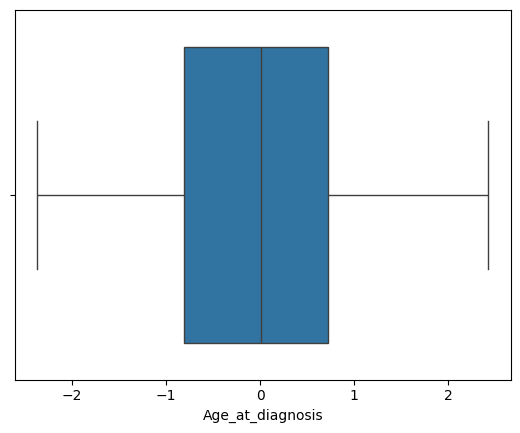

In [438]:
sns.boxplot(X_train, x="Age_at_diagnosis")

# Простые модели

Идея: 
- рассмотреть работу простых моделей на тренировочных данных 
- посмотреть на какие признаки больше всего "смотрят" модели
- как ведёт модель себя на валидации(провести кросс-валидацию)
- посмотреть на инференс модели на тестовом датасете

In [439]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import ValidationCurveDisplay
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import f1_score
from pprint import pprint
import polars as pl

## Логистическая регрессия

Для начала рассмотрим логистическую регрессию. Обучим её на дефолтных значениях и посмотрим на веса модели, чтобы оценить отношение к признакам

In [440]:
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)
log_reg

LogisticRegression()

Можно увидеть, что модель больше всего обращает внимание на признак Mixed glioma, а дальше на anaplastic и Astrocytoma

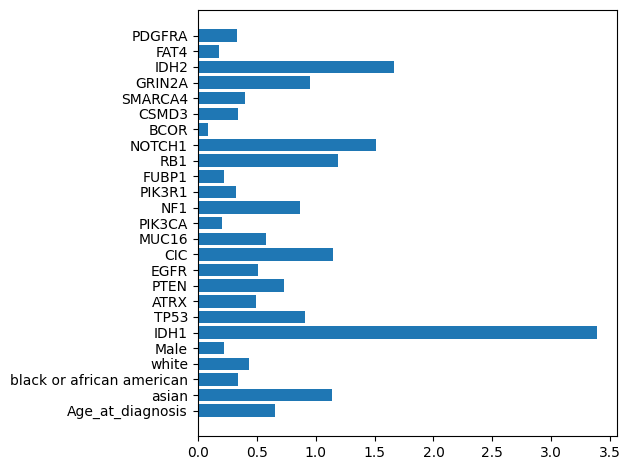

In [441]:
plt.barh(np.arange(25), np.abs(log_reg.coef_[0]))
plt.yticks(np.arange(25), X_train.columns)
plt.tight_layout()
plt.show()

In [442]:
cross_val_res = cross_val_score(log_reg, X_train, y_train, cv=10, scoring="f1")
cross_val_mean = np.mean(cross_val_res)
cross_val_std = np.std(cross_val_res)

print(f"F1 ---- {cross_val_mean:.4f} +/- {cross_val_std:.6f}")

F1 ---- 0.8684 +/- 0.044003


Попробуем взять только признаки: anaplastic, Oligodendroglioma, NOS, Mixed glioma, Astrocytoma и посмотрим как изменится метрика на кросс-валидации

Как можно заметить метрика улучшилась

# Дерево принятия решений

Теперь обучим дерево принятия решений

In [443]:
des_tree = DecisionTreeClassifier()
des_tree.fit(X_train, y_train)
des_tree

DecisionTreeClassifier()

Визуализируем его и попробуем оценить признаки на которые смотрит модель

In [444]:
from supertree import SuperTree

super_tree = SuperTree(
    des_tree,
    X_train.to_numpy(),
    y_train.to_numpy(),
    list(X_train.columns),
    ["LGG", "GBM"],
)
super_tree.show_tree()

In [445]:
cross_val_res = cross_val_score(des_tree, X_train, y_train, cv=10, scoring="f1")
cross_val_mean = np.mean(cross_val_res)
cross_val_std = np.std(cross_val_res)

print(f"F1 ---- {cross_val_mean:.4f} +/- {cross_val_std:.6f}")

F1 ---- 0.7579 +/- 0.078252


Можно заметить, что больше всего разделение происходит на признаках Mixed glioma(как и у логистической регрессии) и TP53

# Наивный Байес

Следующий алгоритм, который мы рассмотрим, будет Гауссовский Наивный Байес

In [446]:
gnb = GaussianNB()
gnb.fit(X_train, y_train)
gnb

GaussianNB()

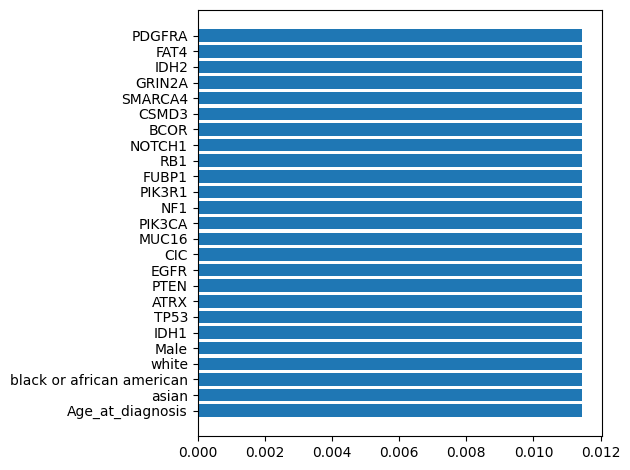

In [447]:
plt.barh(np.arange(25), np.abs(gnb.theta_[0, 1]))
plt.yticks(np.arange(25), X_train.columns)
plt.tight_layout()
plt.show()

In [448]:
cross_val_res = cross_val_score(GaussianNB(), X_train, y_train, cv=10, scoring="f1")
cross_val_mean = np.mean(cross_val_res)
cross_val_std = np.std(cross_val_res)

print(f"F1 ---- {cross_val_mean:.4f} +/- {cross_val_std:.6f}")

F1 ---- 0.8177 +/- 0.044658


LinReg feature selector

In [449]:
def LinReg_stat_heuristic_select_features_with_bootswrap(
    X_train: pd.DataFrame,
    y_train: pd.DataFrame,
    model: LogisticRegression = LogisticRegression(
        C=0.5, penalty="l1", solver="saga", max_iter=1000, verbose=False
    ),
    num_trials: int = 1000,
    sample_size_ratio: float = 0.25,
    heuristic_fn=lambda e, s: e / (s**2),
    top_k: int = 10,
):

    coef_vals = []

    for _ in tqdm(range(num_trials)):
        idx = np.random.choice(
            X_train.shape[0], int(X_train.shape[0] * sample_size_ratio)
        )
        X_train_sampled, y_train_sampled = (
            X_train.to_numpy()[idx, ...],
            y_train.to_numpy()[idx, ...],
        )
        log_reg = model.fit(X_train_sampled, y_train_sampled)

        coef_vals.append(log_reg.coef_[0])

    coef_vals_arr = np.vstack(coef_vals)
    feat_scores = np.abs(
        heuristic_fn(np.mean(coef_vals_arr, 0), np.std(coef_vals_arr, 0))
    )

    best_idx = np.argsort(feat_scores)[-top_k:]

    return (
        pd.DataFrame(
            {"feature": X_train.columns[best_idx], "score": feat_scores[best_idx]}
        )
        .sort_values("score", ascending=False)
        .set_index("feature")
    )

In [450]:
selected_feats_balance = LinReg_stat_heuristic_select_features_with_bootswrap(
    X_train,
    y_train,
    LogisticRegression(
        C=0.5, penalty="l1", solver="saga", max_iter=1000, verbose=False
    ),
    num_trials=20000,
    top_k=10,
)

  9%|▉         | 1863/20000 [00:08<01:18, 232.07it/s]/home/igkh/.local/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
 48%|████▊     | 9622/20000 [00:41<00:45, 227.42it/s]/home/igkh/.local/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
 62%|██████▏   | 12359/20000 [00:53<00:34, 221.46it/s]/home/igkh/.local/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
 74%|███████▍  | 14793/20000 [01:04<00:23, 222.93it/s]/home/igkh/.local/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
100%|██████████| 20000/20000 [01:27<00:00, 228.14it/s]


In [451]:
selected_feats_balance

,score
feature,
IDH1,11.440701
Age_at_diagnosis,9.469692
FUBP1,3.432988
SMARCA4,2.959683
TP53,2.741749
MUC16,2.423561
GRIN2A,2.402697
PTEN,2.255953
RB1,2.051826


In [452]:
selected_feats_cols = selected_feats_balance.index.to_list()

In [453]:
X_train_linreg_selected = X_train[selected_feats_cols]

In [454]:
X_train_linreg_selected

,IDH1,Age_at_diagnosis,FUBP1,SMARCA4,TP53,MUC16,GRIN2A,PTEN,RB1,Male
0,1,1.797502,1,1,1,1,1,1,1,1
1,0,0.137858,1,1,0,0,1,1,1,1
2,0,0.668187,1,1,1,1,1,1,1,0
3,0,0.432622,1,1,1,1,1,1,1,0
4,0,-1.347170,1,1,0,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...
598,1,0.998330,1,1,0,1,1,1,1,1
599,0,-1.504622,1,1,0,1,1,1,1,0
600,0,-1.425283,1,1,0,0,1,1,1,1
601,0,0.030146,1,1,1,1,1,1,1,1


<Axes: >

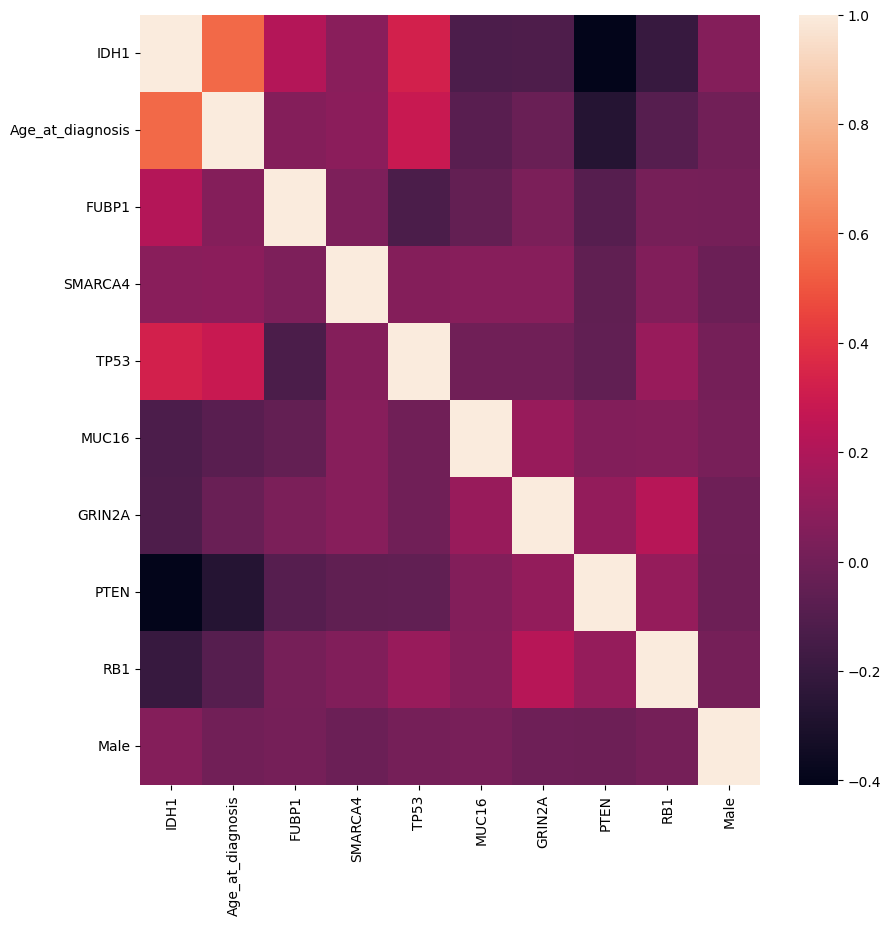

In [457]:
plt.figure(figsize=(10, 10))
sns.heatmap(X_train_linreg_selected.corr())

In [461]:
cross_val_res = cross_val_score(
    LogisticRegression(), X_train_linreg_selected, y_train, cv=10, scoring="f1"
)
cross_val_mean = np.mean(cross_val_res)
cross_val_std = np.std(cross_val_res)

print(f"F1 ---- {cross_val_mean:.4f} +/- {cross_val_std:.6f}")

F1 ---- 0.8487 +/- 0.043362
